Practice problem for exercising the basics of Hartree-Fock theory for molecular orbitals using PySCF. My fundamental understanding for the quantum chemistry practices comes from the book *Modern Quantum Chemistry* by Szabo and Ostlund. In the notebook [STOGauss.ipynb](STOGauss.ipynb), I worked out the computation of STO-2G and STO-3G basis sets using Scipy optimizer. Here I have swtiched to using PySCF to work through the physics at a high level. This notebook also provides the key functions in PySCF to obtaint he lower level results such as core Hamiltonian, Coulomb and exchange matrices, and also the overlap integrals.

In [145]:
import numpy as np
from scipy import linalg
from pyscf import gto, scf, ao2mo
import tqdm
from quantum.utils import plotting as PLT

Build H2 molecule using the `gto` module. Solve it using the restricted Hartree Fock method.

In [146]:
bond_length = 1.4 # Bohr
mol = gto.Mole()
mol.build(atom=f'H 0 0 {-bond_length/2};H 0 0 {bond_length/2}',basis='sto-3g',unit='B')

sol = scf.RHF(mol)
sol.kernel()

# Alternatively
sol = scf.RHF(mol).run()

Hcore = sol.get_hcore()
J,K   = sol.get_jk()
F     = sol.get_fock()
S     = sol.get_ovlp()

# Solution to orbitals in Roothan's equation
E,V = linalg.eigh(F, S)


Eelec_gs = (F[0,0] + F[0,1] + Hcore[0,0] + Hcore[0,1])/(1 + S[0,1])

print(
    'Components of HF Hamiltonian',
    'Hcore=',Hcore, 
    'J=',J, 
    'K=',K,
    'S = ',S,sep='\n')
print(
    'Confirm how Fock matrix is defined in PySCF in the expansion basis (not molecular orbitals)',
    'Fock Matrix (sol.get_fock()) ',F,
    'Hcore + J - K/2 (as in Eq. 3.154 in Szabo & Ostlund)',Hcore + J - K/2,
    'Orbital Energies: Ex 3.26 in Szabo et. al.',E,
    'Properties',
    'Total Electronic Energy (Szabo et. al. Ex 3.27  )',Eelec_gs,
    'Total Electronic Energy (Szabo et. al. Eq. 3.184)', V[:,0] @ (Hcore + F) @ V[:,0],
    'Nuclear Repulsion Energy = ',1/bond_length,
    'Total Ground State Energy (Electronic Energy + Repulsion) ',Eelec_gs + 1/bond_length,
    sep='\n'
    )

converged SCF energy = -1.11671432506255
converged SCF energy = -1.11671432506255
Components of HF Hamiltonian
Hcore=
[[-1.12040901 -0.95837996]
 [-0.95837996 -1.12040901]]
J=
[[1.34543042 0.89330207]
 [0.89330207 1.34543042]]
K=
[[1.18111752 1.05761497]
 [1.05761497 1.18111752]]
S = 
[[1.         0.65931821]
 [0.65931821 1.        ]]
Confirm how Fock matrix is defined in PySCF in the expansion basis (not molecular orbitals)
Fock Matrix (sol.get_fock()) 
[[-0.36553735 -0.59388538]
 [-0.59388538 -0.36553735]]
Hcore + J - K/2 (as in Eq. 3.154 in Szabo & Ostlund)
[[-0.36553735 -0.59388538]
 [-0.59388538 -0.36553735]]
Orbital Energies: Ex 3.26 in Szabo et. al.
[-0.57820298  0.67026777]
Properties
Total Electronic Energy (Szabo et. al. Ex 3.27  )
-1.8310000393482653
Total Electronic Energy (Szabo et. al. Eq. 3.184)
-1.831000039348265
Nuclear Repulsion Energy = 
0.7142857142857143
Total Ground State Energy (Electronic Energy + Repulsion) 
-1.116714325062551


In [153]:
eri=ao2mo.get_ao_eri(mol)
ori=ao2mo.get_mo_eri(eri,sol.mo_coeff)
eri,ori


(array([[0.77460594, 0.44410766, 0.56967593],
        [0.44410766, 0.29702854, 0.44410766],
        [0.56967593, 0.44410766, 0.77460594]]),
 array([[6.74594084e-01, 8.32667268e-17, 6.63563991e-01],
        [9.71445147e-17, 1.81257915e-01, 4.71844785e-16],
        [6.63563991e-01, 3.88578059e-16, 6.97495347e-01]]))

In [155]:
mo_ints = ao2mo.kernel(mol,sol.mo_coeff)
mo_ints

array([[6.74594084e-01, 8.32667268e-17, 6.63563991e-01],
       [9.71445147e-17, 1.81257915e-01, 4.71844785e-16],
       [6.63563991e-01, 3.88578059e-16, 6.97495347e-01]])

In [95]:
bond_length = 1.4 # Bohr
mol = gto.Mole()
mol.build(atom=f'H 0 0 {-bond_length/2};H 0 0 {bond_length/2}',basis='sto-3g',unit='B')

sol = scf.RHF(mol)
sol.kernel()

# Alternatively
sol = scf.UHF(mol).run()

Hcore = sol.get_hcore()
J,K   = sol.get_jk()
F     = sol.get_fock()
S     = sol.get_ovlp()

# Solution to orbitals in Roothan's equation
E1,V1 = linalg.eigh(F[0], S)
E2,V2 = linalg.eigh(F[1], S)


E0 = 1/2*(V1[:,0] @ (Hcore + F[0]) @ V1[:,0] + V2[:,0] @ (Hcore + F[1]) @ V2[:,0])

print(
    'Components of HF Hamiltonian',
    'Hcore=',Hcore, 
    'J=',J, 
    'K=',K,
    'S = ',S,sep='\n')
print(
    'Confirm how Fock matrix is defined in PySCF',
    'Fock Matrix (sol.get_fock()) ',F,
    'Hcore + 2J - K (as in UHF Szabo & Ostlund Eq. 3.316 with closed shell)',Hcore + 2*J[0] - K[0],
    'Orbital Energies: Ex 3.26 in Szabo et. al.',E,
    'Properties',
    'Total Electronic Energy (Szabo et. al. Ex. 3.40 )', E0,
    'Nuclear Repulsion Energy = ',1/bond_length,
    'Total Ground State Energy (Electronic Energy + Repulsion) ',E0 + 1/bond_length,
    sep='\n'
    )

converged SCF energy = -1.11671432506255
converged SCF energy = -1.11671432506255  <S^2> = 0  2S+1 = 1
Components of HF Hamiltonian
Hcore=
[[-1.12040901 -0.95837996]
 [-0.95837996 -1.12040901]]
J=
[[[0.67271521 0.44665104]
  [0.44665104 0.67271521]]

 [[0.67271521 0.44665104]
  [0.44665104 0.67271521]]]
K=
[[[0.59055876 0.52880749]
  [0.52880749 0.59055876]]

 [[0.59055876 0.52880749]
  [0.52880749 0.59055876]]]
S = 
[[1.         0.65931821]
 [0.65931821 1.        ]]
Confirm how Fock matrix is defined in PySCF
Fock Matrix (sol.get_fock()) 
[[[-0.36553735 -0.59388538]
  [-0.59388538 -0.36553735]]

 [[-0.36553735 -0.59388538]
  [-0.59388538 -0.36553735]]]
Hcore + 2J - K (as in UHF Szabo & Ostlund Eq. 3.316 with closed shell)
[[-0.36553735 -0.59388538]
 [-0.59388538 -0.36553735]]
Orbital Energies: Ex 3.26 in Szabo et. al.
[-0.57820298  0.67026777]
Properties
Total Electronic Energy (Szabo et. al. Ex. 3.40 )
-1.831000039348265
Nuclear Repulsion Energy = 
0.7142857142857143
Total Ground Sta

Potential energy surface as a function of Bond Length.

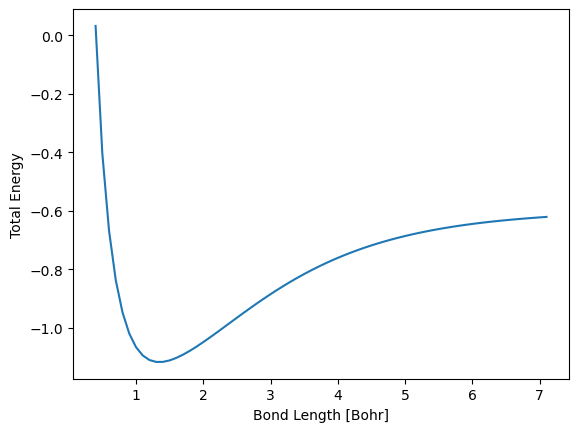

In [11]:
BondLengths = np.arange(0.4,7.2,0.1)
E = np.zeros(len(BondLengths))
for i,d in enumerate(BondLengths):
    mol = gto.Mole()
    mol.build(atom=f'H 0 0 {-d/2};H 0 0 {d/2}',basis='sto-3g',unit='B')
    rhf = scf.RHF(mol)
    rhf.verbose=0  
    rhf.kernel()  
    E[i] = rhf.e_tot
#
fig,ax=PLT.subplots(xlabel='Bond Length [Bohr]',ylabel='Total Energy')
ax.plot(BondLengths,E)

In [108]:
print(sol.energy_nuc(), sol.energy_elec(), sol.energy_tot(),sol.mo_energy)

0.7142857142857143 (-1.8310000393482655, 0.6745940843233696) -1.116714325062551 [-0.57820298  0.67026777]


In [109]:
sol.mo_coeff

array([[ 0.54893404,  1.21146407],
       [ 0.54893404, -1.21146407]])

In [116]:
sol.get_veff()

array([[0.75487166, 0.36449459],
       [0.36449459, 0.75487166]])

In [118]:
sol.build()

In [120]:
sol.run()

converged SCF energy = -1.11671432506255


In [122]:
gto.classical_coulomb_energy(mol)

0.7142857142857143

In [127]:
gto.moleintor.getints('int1e_ipnuc_sph', mol._atm, mol._bas, mol._env, comp=3)

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.17162944,  0.72602207],
        [-0.72602207, -0.17162944]]])

In [130]:
display(
    mol._atm,
    mol._bas,
    mol._env)

array([[ 1, 20,  1, 23,  0,  0],
       [ 1, 24,  1, 27,  0,  0]], dtype=int32)

array([[ 0,  0,  3,  1,  0, 28, 31,  0],
       [ 1,  0,  3,  1,  0, 28, 31,  0]], dtype=int32)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.7       ,  0.        ,  0.        ,
        0.        ,  0.7       ,  0.        ,  3.42525091,  0.62391373,
        0.1688554 ,  0.98170675,  0.94946401,  0.29590645])

In [133]:
help(mol.intor)

Help on method intor in module pyscf.gto.mole:

intor(intor, comp=None, hermi=0, aosym='s1', out=None, shls_slice=None, grids=None) method of pyscf.gto.mole.Mole instance
    Integral generator.

    Args:
        intor : str
            Name of the 1e or 2e AO integrals.  Ref to :func:`getints` for the
            complete list of available 1-electron integral names

    Kwargs:
        comp : int
            Components of the integrals, e.g. int1e_ipovlp_sph has 3 components.
        hermi : int
            Symmetry of the integrals

            | 0 : no symmetry assumed (default)
            | 1 : hermitian
            | 2 : anti-hermitian

        shls_slice : 4-element, 6-element or 8-element tuple
            Label the start-stop shells for each index in the integral.
            For example, the 8-element tuple for the 2-electron integral
            tensor (ij|kl) = intor('int2e') are specified as
            (ish_start, ish_end, jsh_start, jsh_end, ksh_start, ksh_end, lsh_star

In [140]:
gto.getints('int1e_ovlp',mol._atm, mol._bas, mol._env)

array([[1.        +0.j, 0.        +0.j, 0.65931821+0.j, 0.        +0.j],
       [0.        +0.j, 1.        +0.j, 0.        +0.j, 0.65931821+0.j],
       [0.65931821+0.j, 0.        +0.j, 1.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.65931821+0.j, 0.        +0.j, 1.        +0.j]])

In [144]:
I = mol.intor('int2e')
I.shape, I 

((2, 2, 2, 2),
 array([[[[0.77460594, 0.44410766],
          [0.44410766, 0.56967593]],
 
         [[0.44410766, 0.29702854],
          [0.29702854, 0.44410766]]],
 
 
        [[[0.44410766, 0.29702854],
          [0.29702854, 0.44410766]],
 
         [[0.56967593, 0.44410766],
          [0.44410766, 0.77460594]]]]))

In [139]:
help(gto.getints)

Help on function getints in module pyscf.gto.moleintor:

getints(intor_name, atm, bas, env, shls_slice=None, comp=None, hermi=0, aosym='s1', ao_loc=None, cintopt=None, out=None)
    1e and 2e integral generator.

    Args:
        intor_name : str

            ================================  =============
            Function                          Expression
            ================================  =============
            "int1e_ovlp"                      ( \| \)
            "int1e_nuc"                       ( \| nuc \| \)
            "int1e_kin"                       (.5 \| p dot p\)
            "int1e_ia01p"                     (#C(0 1) \| nabla-rinv \| cross p\)
            "int1e_giao_irjxp"                (#C(0 1) \| r cross p\)
            "int1e_cg_irxp"                   (#C(0 1) \| rc cross p\)
            "int1e_giao_a11part"              (-.5 \| nabla-rinv \| r\)
            "int1e_cg_a11part"                (-.5 \| nabla-rinv \| rc\)
            "int1e_a01gp"   